16) Quais são os principais motivos de descarte? Qual valor total de descarte? Qual período com maior descarte? Qual sexo é mais descartado? 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import re as re

In [2]:
#Filtros para trabalhar com os dados da minha datafram
descarte = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
descarte = descarte[(descarte['obs_desc'] != 'AAA') 
            & (descarte['obs_desc'] != '666')
            & (descarte['obs_desc'] != 'Test BioterC')
            & (descarte['obs_desc'] != 'Test')
            & (descarte['num_ani'] < 200)
            & (descarte['util'] == 'desc')
            #& (descarte['num_sex_m'] != 666)
            #& (descarte['num_sex_f'] != 666)
            & (descarte ['m_f'] != 'AAA')
                   ]


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    descarte[d] = pd.to_datetime(descarte[d], unit = 's')
descarte.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
66,2014-08-26 17:58:05,Tania,Swiss B,3,f,2014-04-03 04:00:00,6,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,3,0,Descarte Zootecnico,I
73,2014-09-02 12:20:36,Tania,Swiss B,1,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,p/ acasal.,I
95,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-04-21 04:00:00,67,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Tranferencia cx,AAA
96,2014-09-17 13:14:12,Tania,S129WT,4,m,2014-06-26 04:00:00,68,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,0,Tranferencia cx,AAA
97,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-07-28 04:00:00,69,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Tranferencia cx,AAA


In [3]:
#verificando a quantidade de entradas 'Descarte Zootécnico da série 'obs_desc'
len(descarte[descarte['obs_desc'] == 'Descarte Zootécnico'])

919

In [4]:
#não lembro desse código.
descarte['obs_desc'] = list(map(lambda x: str(x).strip(), descarte['obs_desc']))

In [5]:
len(descarte[descarte['obs_desc'] == 'Descarte Zootécnico'])

922

In [6]:
# desc_df = pd.DataFrame(descarte['obs_desc'])
# desc_df['num_ani'] = descarte['num_ani']
# #desc_df = descarte.set_index('obs_desc')
# desc_df.head()

# #.lower().capitalize()

In [7]:
descarte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1944 entries, 66 to 18379
Data columns (total 28 columns):
date_hoje         1944 non-null datetime64[ns]
user              1942 non-null object
ling              1944 non-null object
num_ani           1944 non-null int64
m_f               1944 non-null object
date_nasc         1944 non-null datetime64[ns]
id_orig           1944 non-null object
util              1944 non-null object
id_solic          1944 non-null int64
data_inicio       1944 non-null datetime64[ns]
time              1944 non-null object
total_time        1944 non-null int64
doses             1944 non-null int64
data_solic        1944 non-null int64
data_forn         1944 non-null int64
data_fim          1944 non-null int64
num_m             1944 non-null int64
num_f             1944 non-null int64
date_acas         1944 non-null datetime64[ns]
date_nasc_acas    1944 non-null datetime64[ns]
num_nasc          1944 non-null int64
date_sex          1944 non-null datetime64

CONCATENAÇÕES DE MOTIVOS - 10% COM MAIS EVENTOS

In [8]:
#Replace erro de cadastro
erro = descarte['obs_desc'].replace(('erro de cadastro', 
                              'erro cadastro', 'error','erro de cadastro era 1 fêmea','erro  de cadastro',
                             'erro programa','Transferencia error','erro de contagem','erro de cadatro',
                             'erro de casa','erro sexagem','Erro Cadastro', 'Erro cadastro', 'Erro cadastro',
                              'Erro de Cadastro', 'Erro no cadastro','Animais fornecidos para Fabiano Figueiredo em 15/02/2018 - Erro no sistema (Exp. já encerrado).',
                              'Erro de registro','Erro de cadastro. Eram femeas', 'Erro de sexagem', 'Erro de cadastro, não estava na cx',
                             'Erro de lançamento no bioterc', 'teste de cadastro', 'ñ encontrado na cx',
                                    'nao estava na cx', 'Erro de cadastro', 'não estava na cx', 'não foi achado animal'), 'Erro de cadastro', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [9]:
#Replace fornecido zoológico
zoo = descarte['obs_desc'].replace(('ZOO', 'fornecido Zoológico', 
                              'Fornecido zoológico', 
                              'Fornecido Zoológico', 
                              'Fornecidos Zoológico',
                             'fornecido zoológico',
                             'zoo', 'zoologico'),'Fornecido Zoológico', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [10]:
#Replace velhos
velhos = descarte['obs_desc'].replace(('velhos', 
                              'ANIMAIS VELHOS',
                             'Animais velhos',
                             'Animais Velhos',
                             'Animal velho'), 'Velhos', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [11]:
#Replace Descarte zootécnico
descart_zoo = descarte['obs_desc'].replace(('Descarte Zootecnico', 
                              'Caixa caiu no chão > Descarte Zootécnico',
                             'Animais com idade apropriada para descarte zootécnico',
                             'descarte'), 'Descarte Zootécnico', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [12]:
#Replace monitoramento sanitário
monitoramento = descarte['obs_desc'].replace(('monitoramento sanitario', 
                                              'Kelly monitoramento', 'Monitoramento Sanitátio',
                                             'Monitoramento Sanitátio', 'Controle Sanitário'), 'Monitoramento Sanitátio', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [13]:
#Replace excesso de filhotes
ex_filho = descarte['obs_desc'].replace(('Excesso de filhotes', 'Filhotes em excesso'), 'Excesso de Filhotes', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [14]:
#Replace para acasalamento
acasa = descarte['obs_desc'].replace(('para acasalamento', 
                              'usada em acasalamento',
                             'P acasalamento experim Rosiane',
                             'Usado em acasalamento',
                             'p acasalamento',
                             'Para acasalamento 21136',
                             'Foi para o acasalamento B2',
                             'foi para acasalamento',
                             'para acasalamento 2:1',
                             'Foi para o acasalamento - Troca de macho',
                             'Usada em acasalamento',
                             'Para acasalamento 2:1',
                             'Foi encaminhada para acasalamento',
                             'Foi encaminhada para acasalamento na experimentação',
                             'Para o acasalamento 193',
                             'Usada no acasalamento 5.50',
                             'para acasalamento 3:!',
                             'Para acasalamento 25568',
                             'Usada no acasalamento 2.54',
                             'Enviado para acasalamento na experimentação.',
                             'Usada no acasalamento',
                             'femea usada em acasalamento 2:1',
                             'Para acasalamento da cesárea', 'Foi encaminhada para acasalamento na experimentação',
                                      'Foi encaminhada para acasalamento','Para Acasalamentos', 'Acasalamento Derivação Cesariana'
                            'Acasalamento Cesárea', 'Acasalamento Cesárea', 'Para acasal', 'ACASAL'), 'Para acasalamento', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [15]:
#Replace exp lorena
lorena = descarte['obs_desc'].replace('Lorena', 'Exp Lorena', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [16]:
#Replace ninhada grande
ninhada_g = descarte['obs_desc'].replace(('ninhada grande', 'Animais |Sacrificados ninhada grande',
                                         'ninhada muito grande', 'Filhote menor na ninhada'),'Ninhada Grande', inplace=True)

In [17]:
#Replace transferencia caixa
test_lista = ['nao estavam na cx', 'Transferido para a cx 526141', 'haviam apenas 10 na cx', 'Transferido para a cx 3-1-4-74',
                                        'Transf para a cx 436', 'Transferido para a cx 21237',
                                        'Transferência de cx', 'Troca de cx', 'Transferido para cx 513143',
                                        'Transferido para a cx 512142', 'Transferidos 3 para cx 3.38',
                                        'Transferido para a cx 514144', 'transferência de cx',
                                        'Tranferencia cx', 'Transferido para cx 522150',
                                        'para outra cx', 'Trocado de cx']
trans_cx = descarte['obs_desc'].replace(test_lista, 'Transferencia cx', inplace=True)
trans_cx

In [18]:
#Replace canibalismo
caniba = descarte['obs_desc'].replace('Fêmea comeu filhotes', 'Canibalismo',inplace=True)

In [19]:
#lista com 10% das observações com maior numero de animais;
lista_10por_super = list(descarte['obs_desc'].value_counts()[:21].index)
lista_10por_super

['Descarte Zootécnico',
 'Fim Experimento',
 'Velhos',
 'Fornecido Zoológico',
 'Para acasalamento',
 'Erro de cadastro',
 'Encontrado Morto',
 'UEL',
 'Mudança',
 'Animais Doentes',
 'Cascavel',
 'Troca de Macho',
 'Transferencia cx',
 'Monitoramento Sanitário',
 'Exp Lorena',
 'Ivermectina',
 '.',
 'Fornecimento Guilhermina - Sem número do comitê de Ética',
 'Fornecimento Recife - Sem número do comitê de Ética',
 'Erro Experimento',
 'Monitoramento Sanitátio']

In [20]:
#lista com observações inferiores aos 10%
lista_10por_infer = list(descarte['obs_desc'].value_counts()[21:].index)
lista_10por_infer[:10]

['Troca de Fêmea',
 'TCC João',
 'nan',
 'Presenca de fungo na caixa.',
 'Teste BioterC',
 'Teste',
 'Exp João',
 'Fim teste',
 'teste',
 'briga']

Criada lista que vai receber todos os termos com condições;


In [21]:
#Lista com termos para pesquisa, sem a primera e ultima letra
lista_termos_pesq = list()
for i in lista_10por_super: #laço para que percorra na lista e itere em i
#     print(i)
    obs = i.split(' ') #uma nova variavel vai receber o que tem em i e separar pelos espaços
    for j in obs:      #novo laço que vai percorrer em obs e guardar em j
        if len(j) > 3: #condição para que os termos sejam maiores que 3 letras
            if len(j) > 4: #condição para seja maior que 4
                lista_termos_pesq.append(j[1:-1]) #append= adicionando essas informações na lista_termos_pesq e que retire a primeira e ultima letra 
            else:
                lista_termos_pesq.append(j[1:]) #se não só a primera.
lista_termos_pesq

['escart',
 'ootécnic',
 'xperiment',
 'elho',
 'ornecid',
 'oológic',
 'ara',
 'casalament',
 'rro',
 'adastr',
 'ncontrad',
 'ort',
 'udanç',
 'nimai',
 'oente',
 'ascave',
 'roc',
 'ach',
 'ransferenci',
 'onitorament',
 'anitári',
 'oren',
 'vermectin',
 'orneciment',
 'uilhermin',
 'úmer',
 'omit',
 'tic',
 'orneciment',
 'ecif',
 'úmer',
 'omit',
 'tic',
 'rro',
 'xperiment',
 'onitorament',
 'anitáti']

In [22]:
#Na dataframe descarte - coluna obs_desc, buscando padrões para fazer o replace de diferentes termos
#str - indica que é uma string/ contains onde buscarei o padrão / astype boleano/ e apresentando os valores dessa mesma coluna.



termos_repetidos = dict() #criado dicionario pra armazenar os motivos e as repetições dos seus termos;

for i in lista_termos_pesq:
    lista_resol = list(descarte[descarte['obs_desc'].str.contains(i, regex=False).astype('bool')]['obs_desc'].value_counts().index)
    termos_repetidos[i] = lista_resol
# for i, j in enumerate(termos_repetidos['escart']):
# #     print(j)
#         if i != 2:
#             print(j)
termos_repetidos

{'escart': ['Descarte Zootécnico',
  'Descarte',
  'Não foram descartados estes animais, mas como o site não está permitindo lançar o ID 65 para esta caixa, porque ela é para experimento, e não para estoque, estou removendo da situação de estoque.',
  'Descarte por idade'],
 'ootécnic': ['Descarte Zootécnico'],
 'xperiment': ['Fim Experimento',
  'Erro Experimento',
  'fornecido para experimento',
  'experimentos',
  'Fornecido para experimento do Henrique',
  'experimento Camila',
  'Fornecidos Experimento Pré Imune Reagente',
  'Fornecido Para Experimento Bruno',
  'Fornecida experimento 182 / Juliano',
  'experimento',
  'Abandono de Experimento',
  'Fornecido para Experimento',
  'Fornecidos para experimento',
  'Não foram descartados estes animais, mas como o site não está permitindo lançar o ID 65 para esta caixa, porque ela é para experimento, e não para estoque, estou removendo da situação de estoque.',
  'para experimento'],
 'elho': ['Velhos'],
 'ornecid': ['Fornecido Zoológi

In [23]:
termos_repetidos['onitorament']

['Monitoramento Sanitário', 'Monitoramento Sanitátio']

In [24]:
#replace descarte zootécnico - outro formato
descarte_z = descarte['obs_desc'].replace(termos_repetidos['escart'], 'Descarte Zootécnico', inplace=True)
descarte_z

In [25]:
#replace encontrado morto
morto = descarte['obs_desc'].replace(termos_repetidos['ort'], 'Encontrado Morto', inplace=True)
morto

In [26]:
#replace animais doentes
animais_doentes = descarte['obs_desc'].replace(termos_repetidos['oente'], 'Animais Doentes', inplace=True)
animais_doentes

In [27]:
#o que tiver em lista_termos_pesq coloque em i e faça isso:
for i in lista_termos_pesq:
    descarte['obs_desc'].replace(termos_repetidos[i], 'Descarte Zootécnico', inplace=True)
#     print(termos_repetidos[i])
    break

FIM DAS CONCATENAÇÕES DOS 10% SUPERIORES

Criar termo outros para os 10% valores inferiores.

Posso guardar o que tem dentro da lista 'lista_10por_infer' em outra lista ou dicionário e chamar de 'Outros' (para os demais motivos das observações). Mas como eu poderia plotar isso em um gráfico depois?

In [28]:
lista_10por_super = list(descarte['obs_desc'].value_counts()[:18].index)
lista_10por_super

['Descarte Zootécnico',
 'Fim Experimento',
 'Velhos',
 'Fornecido Zoológico',
 'Para acasalamento',
 'Erro de cadastro',
 'Encontrado Morto',
 'UEL',
 'Mudança',
 'Animais Doentes',
 'Cascavel',
 'Troca de Macho',
 'Transferencia cx',
 'Monitoramento Sanitário',
 'Ivermectina',
 'Exp Lorena',
 '.',
 'Fornecimento Guilhermina - Sem número do comitê de Ética']

In [29]:
lista_10por_super

['Descarte Zootécnico',
 'Fim Experimento',
 'Velhos',
 'Fornecido Zoológico',
 'Para acasalamento',
 'Erro de cadastro',
 'Encontrado Morto',
 'UEL',
 'Mudança',
 'Animais Doentes',
 'Cascavel',
 'Troca de Macho',
 'Transferencia cx',
 'Monitoramento Sanitário',
 'Ivermectina',
 'Exp Lorena',
 '.',
 'Fornecimento Guilhermina - Sem número do comitê de Ética']

In [30]:
#descarte['obs_desc']

In [31]:
#testando a função isin - ela busca os termos que tenho na minha lista dentro de uma série.
lista_test = ['teste1', 'teste2', 'teste3']
serie_test = pd.Series(['test1', 'teste2', 'teste3'])

serie_test.isin(lista_test)

0    False
1     True
2     True
dtype: bool

In [32]:
#testando a função isin - ela busca os termos que tenho na minha lista dentro de uma série.
lista_testanu = ['Descarte Zootécnico','p/ acasal.','Transferencia cx']
descarte['obs_desc'][descarte['obs_desc'].isin(lista_testanu)].head()

id
66    Descarte Zootécnico
73             p/ acasal.
95       Transferencia cx
96       Transferencia cx
97       Transferencia cx
Name: obs_desc, dtype: object

ADICIONANDO INSTÂNCIAS A DATAFRAME A SER TRABALHADA

In [33]:
descarte_filtrada = descarte[descarte['obs_desc'].isin(lista_10por_super)]

descarte_filtrada.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
66,2014-08-26 17:58:05,Tania,Swiss B,3,f,2014-04-03 04:00:00,6,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,3,0,Descarte Zootécnico,I
95,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-04-21 04:00:00,67,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Transferencia cx,AAA
96,2014-09-17 13:14:12,Tania,S129WT,4,m,2014-06-26 04:00:00,68,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,0,Transferencia cx,AAA
97,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-07-28 04:00:00,69,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Transferencia cx,AAA
98,2014-09-17 13:14:12,Tania,S129WT,3,f,2014-07-28 04:00:00,70,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,3,0,Transferencia cx,AAA


In [34]:
#DataFrame 10% dos dados

descarte_filtrada_10inf = descarte[descarte['obs_desc'].isin(lista_10por_infer)]

descarte_filtrada_10inf.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
73,2014-09-02 12:20:36,Tania,Swiss B,1,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,p/ acasal.,I
161,2014-10-01 12:37:47,Tania,Swiss A,4,m,2014-06-10 00:00:00,145,desc,6,2014-10-01 00:00:00,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,0,Teste,AAA
162,2014-10-01 12:42:40,Tania,Balb/c,20,f,2014-06-10 00:00:00,158,desc,1,2014-11-05 00:00:00,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,20,0,Teste,AAA
248,2014-10-03 17:14:44,Tania,S129KO,4,m,2014-06-24 00:00:00,102,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,2,experimento,AAA
263,2014-10-06 18:27:59,Tania,Balb/c,6,f,2014-08-22 00:00:00,140,desc,7,2014-10-01 00:00:00,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,6,4,nan,AAA


In [35]:
#DataFrame 10% dos dados

descarte_filtrada_10inf = descarte[descarte['obs_desc'].isin(lista_10por_infer)]

descarte_filtrada_10inf['num_ani'].sum()

407

In [36]:
#Verificando localização de duas instâncias - fatiamento
descarte_filtrada_10inf.iloc[0:2]

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
73,2014-09-02 12:20:36,Tania,Swiss B,1,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,p/ acasal.,I
161,2014-10-01 12:37:47,Tania,Swiss A,4,m,2014-06-10 00:00:00,145,desc,6,2014-10-01 00:00:00,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,0,Teste,AAA


In [37]:
#Criando a unica instância com todas as informações a partir da DataFrame dos 10% inferiores.

outros_numtotal = descarte_filtrada_10inf.iloc[0] #buscando a posição 0 na minha dataframe e guardando numa variável do tipo série
outros_numtotal['num_ani'] = descarte_filtrada_10inf['num_ani'].sum() #somada o numero de animais da coluna 'num_ani' e guardada na coluna 'num_ani'da serie criada
outros_numtotal['obs_desc'] = 'Outros' #Renomeada como outros o que tem na coluna 'obs_desc'
outros_numtotal['m_f'] = 'nao'
outros_numtotal 

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


date_hoje         2014-09-02 12:20:36
user                            Tania
ling                          Swiss B
num_ani                           407
m_f                               nao
date_nasc         2014-06-10 04:00:00
id_orig                            55
util                             desc
id_solic                          666
data_inicio       1970-01-01 00:11:06
time                              AAA
total_time                        666
doses                             666
data_solic                        666
data_forn                         666
data_fim                   1409660436
num_m                             666
num_f                             666
date_acas         1970-01-01 00:11:06
date_nasc_acas    1970-01-01 00:11:06
num_nasc                          666
date_sex          1970-01-01 00:11:06
num_sex_m                         666
num_sex_f                         666
num_ani_ini                         1
num_ani_fim                         0
obs_desc    

In [38]:
#Adicionando a minha DataFrame definita com a função append e nela contém a minha série criada acima.

descarte_filtrada = descarte_filtrada.append(outros_numtotal)
descarte_filtrada.tail() #ultimas 5 instâncias.

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18376,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18115,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
73,2014-09-02 12:20:36,Tania,Swiss B,407,nao,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Outros,I


In [39]:
#Verificando se funcionou a nova entrada

descarte_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 66 to 73
Data columns (total 28 columns):
date_hoje         1794 non-null datetime64[ns]
user              1792 non-null object
ling              1794 non-null object
num_ani           1794 non-null int64
m_f               1794 non-null object
date_nasc         1794 non-null datetime64[ns]
id_orig           1794 non-null object
util              1794 non-null object
id_solic          1794 non-null int64
data_inicio       1794 non-null datetime64[ns]
time              1794 non-null object
total_time        1794 non-null int64
doses             1794 non-null int64
data_solic        1794 non-null int64
data_forn         1794 non-null int64
data_fim          1794 non-null int64
num_m             1794 non-null int64
num_f             1794 non-null int64
date_acas         1794 non-null datetime64[ns]
date_nasc_acas    1794 non-null datetime64[ns]
num_nasc          1794 non-null int64
date_sex          1794 non-null datetime64[ns

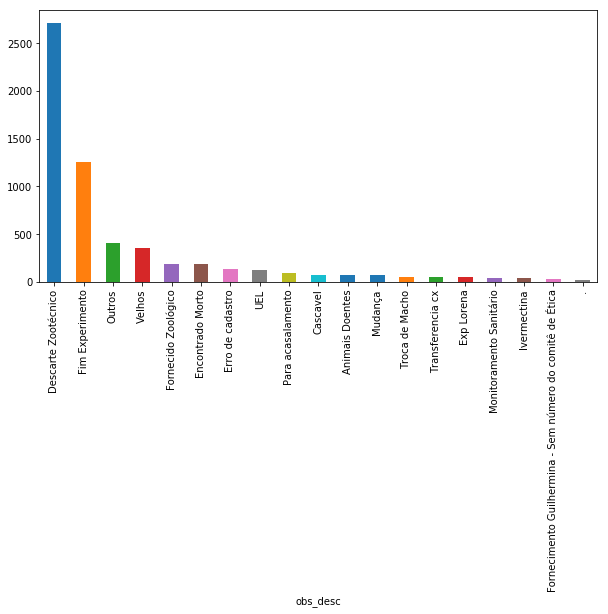

In [40]:
#testando grafico do numero total de animais.

plt.figure(figsize=(10,5))
plot_total_animais = descarte_filtrada.groupby('obs_desc')
plot_total_animais['num_ani'].sum().sort_values(ascending=False)[:25].plot(
    kind='bar'
)

In [41]:
# #DataFrame 90% dos dados

# descarte_filtrada_10por_super = descarte[descarte['obs_desc'].isin(lista_10por_super)]
# #descarte_filtrada_10por_super = descarte_filtrada_10por_super.groupby('obs_desc')
# descarte_filtrada_10por_super = descarte_filtrada_10por_super[descarte_filtrada_10por_super['m_f'] == 'm']['num_ani'].sum()
# #descarte_filtrada_10por_super.append(descarte_filtrada_10inf[descarte_filtrada_10inf['m_f'] == 'm']['num_ani'].sum())
# #descarte_filtrada_10por_super.append(descarte_filtrada_10inf['num_ani'])

# descarte_filtrada_10por_super

In [42]:
outros_m = descarte_filtrada_10inf.iloc[0] #buscando a posição 0 na minha dataframe e guardando numa variável do tipo série
outros_m['num_ani'] = descarte_filtrada_10inf[descarte_filtrada_10inf['m_f']=='m']['num_ani'].sum() #somada o numero de animais da coluna 'num_ani' e guardada na coluna 'num_ani'da serie criada
outros_m['obs_desc'] = 'Outros camundongo machos' #Renomeada como outros o que tem na coluna 'obs_desc'
outros_m

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


date_hoje              2014-09-02 12:20:36
user                                 Tania
ling                               Swiss B
num_ani                                179
m_f                                      m
date_nasc              2014-06-10 04:00:00
id_orig                                 55
util                                  desc
id_solic                               666
data_inicio            1970-01-01 00:11:06
time                                   AAA
total_time                             666
doses                                  666
data_solic                             666
data_forn                              666
data_fim                        1409660436
num_m                                  666
num_f                                  666
date_acas              1970-01-01 00:11:06
date_nasc_acas         1970-01-01 00:11:06
num_nasc                               666
date_sex               1970-01-01 00:11:06
num_sex_m                              666
num_sex_f  

In [43]:
descarte_filtrada = descarte_filtrada.append(outros_m)
descarte_filtrada.tail() #ultimas 5 instâncias.

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
18377,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18117,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18378,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18119,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
18379,2019-06-14 14:25:57,Tania,C57BL/6,5,f,2019-05-29 03:00:00,18121,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,5,0,Descarte Zootécnico,AAA
73,2014-09-02 12:20:36,Tania,Swiss B,407,nao,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Outros,I
73,2014-09-02 12:20:36,Tania,Swiss B,179,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,Outros camundongo machos,I


In [46]:
#verificando se somou os camundongos machos adicionados a dataframe.
descarte_filtrada[descarte_filtrada['m_f'] == 'm']['num_ani'].sum()

2942

In [55]:
# plt.figure(figsize=(10,5))

plot_machos = descarte_filtrada.groupby('obs_desc')
plot_machos[plot_machos['m_f']=='m']['num_ani'].sum().sort_values(ascending=False).plot(
     kind='bar'
 )


KeyError: 'Column not found: False'

In [ ]:
#Função nlargest com os parametros vai apresentar os maiores valores dentro de um limite
#Por exemplo 25 maiores valores na coluna num_ani
descarte.nlargest(25, 'num_ani').head()

In [ ]:
plt.figure(figsize=(20,10))
num_animais_t = descarte_filtrada_10por_super.groupby('obs_desc')
num_animais_t['num_ani'].sum().sort_values(ascending=False)[:25].plot(
    kind='bar'
)

In [ ]:
descarte['obs_desc'].value_counts()[:25].sum()

In [ ]:
num_animais = descarte.groupby('obs_desc')
num_animais['num_ani'].sum().sort_values(ascending=False)[:25].sum()

In [ ]:
#somar os demais termos e nomear por outros
descarte['obs_desc'].value_counts()[25:].sum()


In [ ]:
num_animais = descarte.groupby('obs_desc')
num_animais['num_ani'].sum().sort_values(ascending=False)[25:].sum()

In [ ]:
plt.figure(figsize=(20,10))
descarte[descarte['obs_desc']].values_counts()[:25].plot(
    kind='bar'
)

In [ ]:
#motivo de descarte
plt.figure(figsize=(20,10))
descarte[(descarte['obs_desc'] != 'AAA')
     & (descarte['obs_desc'] != '666')
    & (descarte['num_ani'] < 200)
    ]['obs_desc'].value_counts()[:18].plot(
    kind='bar'
)

#desc[desc['obs_desc'] == 'Descarte Zootécnico']['num_ani'].sum()

In [ ]:
plt.figure(figsize=(20,10))
num_animais = descarte.groupby('obs_desc')
num_animais['num_ani'].sum().sort_values(ascending=False)[:25].plot(
    kind='bar'
)

In [ ]:
desc_sexag = pd.DataFrame(descarte['obs_des'])
desc_sexag['num_ani'] = descarte['num_ani']
desc_sexag[]
# desc_df = pd.DataFrame(descarte['obs_desc'])
# desc_df['num_ani'] = descarte['num_ani']
# #desc_df = descarte.set_index('obs_desc')
# desc_df.head()